In [543]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import scipy.stats

In [544]:
#read data with pandas library
df= pd.read_excel("dataset.xlsx",engine="openpyxl")

In [545]:
df.head(3) #First 3 samples of the our dataset:

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22.0,17.0,3.0,169.0,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,AndroidAsyncHTTP-master,11.0,20.0,14.0,494.0,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,android-pdf-viewer-master,2.0,1.0,0.0,4.0,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667


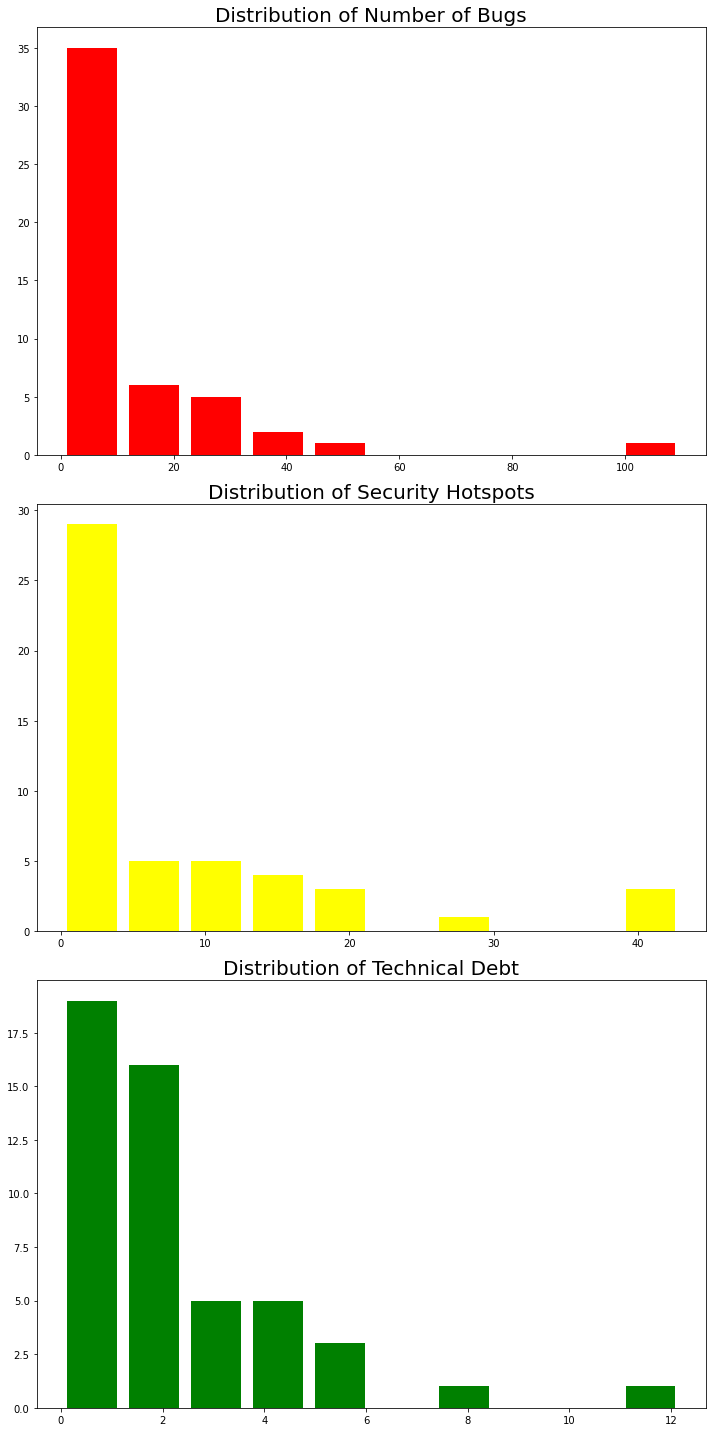

In [546]:
#show the distribution of 3 metrics
fig,axes = plt.subplots(nrows=3,ncols=1,figsize=(10,20))

Number_of_Bugs=df["NOB"]
axes[0].hist(Number_of_Bugs,histtype="bar",color="red",rwidth=0.8)
axes[0].set_title("Distribution of Number of Bugs",fontsize=20)
Number_of_Bugs=df["SH"]
axes[1].hist(Number_of_Bugs,histtype="bar",color="yellow",rwidth=0.8)
axes[1].set_title("Distribution of Security Hotspots",fontsize=20)
Number_of_Bugs=df["TD"]
axes[2].hist(Number_of_Bugs,histtype="bar",color="green",rwidth=0.8)
axes[2].set_title("Distribution of Technical Debt",fontsize=20)

plt.tight_layout()


In [547]:
#Min max scaler for all data
df= pd.read_excel("dataset.xlsx")

def normalize(x):
    min = np.min(x)
    max = np.max(x)
    range = max - min

    return [(a - min) / range for a in x]

for i in df.columns[1:]:
    df.dropna(subset = [i],inplace=True)
    df[i] = normalize(df[i])

df[df.columns[1:]]

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,0.200000,0.055556,0.069767,0.0845,0.070707,0.081967,0.450368,0.547340,0.241690,0.328644,0.215585,0.467183,0.678344,0.483014,0.493334,0.904251
1,0.100000,0.065359,0.325581,0.2470,0.237374,0.491803,0.586374,0.604499,1.000000,0.295288,0.624553,0.432401,0.423548,0.396145,0.465703,1.000000
2,0.018182,0.003268,0.000000,0.0020,0.000000,1.000000,0.000000,0.136835,0.076369,0.091712,0.275531,0.235422,0.536514,0.219697,0.231116,0.765504
3,0.009091,0.003268,0.023256,0.0030,0.000000,0.172131,0.102941,0.273670,0.177037,0.104300,0.204577,0.411564,0.362383,0.200758,0.299212,0.765504
4,0.000000,0.019608,0.000000,0.1265,0.171717,0.344262,0.044649,0.778146,0.088330,0.834019,1.000000,1.000000,0.885917,0.248036,1.000000,0.415032
5,0.036364,0.058824,0.162791,0.0500,0.191919,0.254098,0.247059,0.514500,0.279926,0.755345,0.176454,0.532671,0.779704,0.427866,0.745788,0.845116
6,0.136364,0.009804,0.000000,0.0775,0.151515,0.081967,0.298861,0.681968,0.338284,0.573309,0.692028,0.541490,0.664970,0.528409,0.524693,0.725994
7,0.009091,0.000000,0.000000,0.0345,0.050505,0.016393,0.000000,0.000000,0.000000,1.000000,0.103223,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.309091,1.000000,1.000000,1.0000,0.510101,0.139344,0.618665,1.000000,0.332216,0.716229,0.337156,0.743482,0.633001,0.391777,0.826300,0.692359
9,0.000000,0.039216,0.186047,0.0670,0.000000,0.245902,0.315394,0.596833,0.252593,0.110854,0.127673,0.374684,0.473776,0.370890,0.308613,0.517937


# Part1 (Statistical Correlation Analysis)

In [548]:
#Show the correlation matrix of all metrics
cor_matrix_of_all=df.corr(method="spearman")
cor_matrix_of_all

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383,0.407858,0.353351,0.447180,0.349883,0.369028,0.458483,0.277107,0.062748,0.507420,0.245963
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757,0.409002,0.426221,0.345986,0.243636,0.208594,0.468565,0.289585,0.029765,0.397770,0.110767
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546,0.512876,0.391886,0.425499,0.129174,0.204069,0.278723,0.156120,-0.016116,0.349367,0.107688
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611,0.402859,0.577439,0.492868,0.440458,0.260596,0.456943,0.388502,0.065511,0.569857,0.218801
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.407858,0.409002,0.512876,0.402859,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.353351,0.426221,0.391886,0.577439,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.447180,0.345986,0.425499,0.492868,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.349883,0.243636,0.129174,0.440458,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072


In [549]:
#P values of Spearman Correlation Table

df=df.drop("Name", axis = 1)
p_values=scipy.stats.spearmanr(df)[1]
df2=pd.DataFrame(p_values,index = df.columns, columns = df.columns).round(4)
df2

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,0.0000,0.0000,0.0000,0.0000,0.0076,0.3558,0.0033,0.0118,0.0011,0.0127,0.0084,0.0008,0.0514,0.6651,0.0002,0.0851
V,0.0000,0.0000,0.0000,0.0000,0.0486,0.0364,0.0032,0.0020,0.0138,0.0882,0.1460,0.0006,0.0414,0.8374,0.0042,0.4438
SH,0.0000,0.0000,0.0000,0.0000,0.0058,0.8548,0.0001,0.0049,0.0021,0.3713,0.1552,0.0500,0.2790,0.9115,0.0129,0.4566
CS,0.0000,0.0000,0.0000,0.0000,0.0000,0.1756,0.0037,0.0000,0.0003,0.0014,0.0676,0.0009,0.0053,0.6513,0.0000,0.1269
CDR,0.0076,0.0486,0.0058,0.0000,0.0000,0.9264,0.1800,0.1394,0.0918,0.0198,0.2330,0.0881,0.0971,0.7897,0.0146,0.3935
TD,0.3558,0.0364,0.8548,0.1756,0.9264,0.0000,0.2119,0.9250,0.3819,0.8302,0.4293,0.0945,0.0930,0.9059,0.3771,0.0122
NOC,0.0033,0.0032,0.0001,0.0037,0.1800,0.2119,0.0000,0.0000,0.0000,0.4058,0.0360,0.0596,0.6078,0.9258,0.2283,0.2557
CBO,0.0118,0.0020,0.0049,0.0000,0.1394,0.9250,0.0000,0.0000,0.0023,0.2188,0.0794,0.0000,0.0919,0.4483,0.0003,0.9992
RFC,0.0011,0.0138,0.0021,0.0003,0.0918,0.3819,0.0000,0.0023,0.0000,0.3513,0.0062,0.0027,0.6165,0.0012,0.0001,0.0970
LOC,0.0127,0.0882,0.3713,0.0014,0.0198,0.8302,0.4058,0.2188,0.3513,0.0000,0.3807,0.0000,0.0000,0.6515,0.0000,0.2082


<AxesSubplot:>

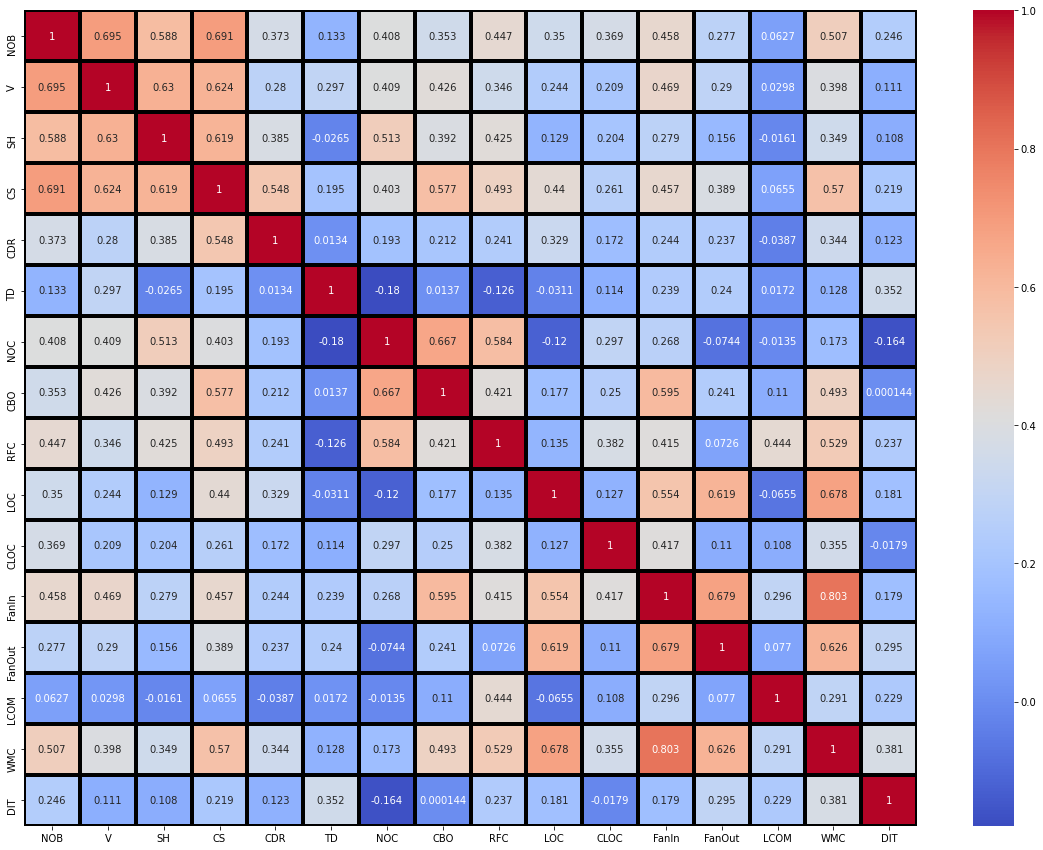

In [553]:
#If you want to see heatmap of the correlation matrix, you can launch code below:

fig, ax = plt.subplots(figsize=(20,15))

sns.heatmap(cor_matrix_of_all, annot=True, fmt='.3g', cmap= 'coolwarm', linewidths=3, linecolor='black', ax=ax)

In [554]:
#Correlation between External Metrics & TD

External_Metrics=df[["NOB","V","SH","CS"]]
TD=df[["CDR","TD"]]
#method="spearman" 

EMT=pd.concat([TD,External_Metrics], axis=1, keys=['TD','External_Metrics']).corr(method="spearman").loc['External_Metrics','TD']
EMT

,CDR,TD
NOB,0.373251,0.133383
V,0.280358,0.296757
SH,0.384657,-0.026546
CS,0.548113,0.194611


In [555]:
#Correlation between Internal Metrics & TD,

Internal_Metrics=df[["NOC","CBO","LCOM","FanIn","FanOut","RFC","DIT","WMC","LOC","CLOC"]]
TD=df[["CDR","TD"]]

IMT=pd.concat([TD,Internal_Metrics], axis=1, keys=['TD','Internal_Metrics']).corr(method="spearman").loc['Internal_Metrics','TD']
IMT

,CDR,TD
NOC,0.192707,-0.179659
CBO,0.212007,0.013652
LCOM,-0.038683,0.017159
FanIn,0.243709,0.239077
FanOut,0.237237,0.240135
RFC,0.240992,-0.126364
DIT,0.123330,0.352010
WMC,0.343628,0.127638
LOC,0.328527,-0.031098
CLOC,0.171773,0.114297


# Part2 (ML Modelling)



We are going to use 5 different ML Regression Models to predict Technical Debt values:

>Linear Regression

>Support Vector Regression

>Decision Tree Regression

>Random Forest Tree Regression

>Multi-layer Perceptron

70% of our data will be used as training set and 30% as test set. Training and test sets will be randomly. The “random_state” variable will have a fixed value so that all models get the same random data. In this way, we will be able to evaluate the success rate of the different models objectively.


In [599]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid
from scipy import stats

random_state_fixed=53

#Linear Regressor is one of the best choice for the data that is correlated linearly:

def linearRegression(x_train,y_train,x_test,y_test):
    global reg_all
    global yy_pred
    global yy_test
    
    yy_test=y_test
    
    y_train=np.ravel(y_train)
    
    reg_all = LinearRegression()
    reg_all.fit(x_train,y_train)

    yy_pred=reg_all.predict(x_test)
    yy_pred=pd.DataFrame(yy_pred,index = yy_test.index)


#SVR is also one of the most common regressor that used for regression predictions
def svrRegressionker_rbf(x_train,y_train,x_test,y_test):
    global reg_all
    global yy_pred
    global yy_test
    
    yy_test=y_test
    
    y_train=np.ravel(y_train)
    
    reg_all = SVR(kernel='rbf')
    reg_all.fit(x_train,y_train)

    yy_pred=reg_all.predict(x_test)
    yy_pred=pd.DataFrame(yy_pred,index = yy_test.index)

def svrRegressionker_linear(x_train,y_train,x_test,y_test):
    global reg_all
    global yy_pred
    global yy_test
    
    yy_test=y_test
    
    y_train=np.ravel(y_train)
    
    reg_all = SVR(kernel='linear')
    reg_all.fit(x_train,y_train)

    yy_pred=reg_all.predict(x_test)
    yy_pred=pd.DataFrame(yy_pred,index = yy_test.index)
    
    

def decisionTreeRegression(x_train,y_train,x_test,y_test):
    
    global reg_all
    global yy_pred
    global yy_test
    
    yy_test=y_test
    
    y_train=np.ravel(y_train)
    
    reg_all = DecisionTreeRegressor(random_state=random_state_fixed)
    reg_all.fit(x_train,y_train)

    yy_pred=reg_all.predict(x_test)
    yy_pred=pd.DataFrame(yy_pred,index = yy_test.index)

    
    
def randomDecTreeRegression(x_train,y_train,x_test,y_test):
    global reg_all
    global yy_pred
    global yy_test

    yy_test=y_test
    
    y_train=np.ravel(y_train)

    reg_all = RandomForestRegressor(random_state=random_state_fixed)
    reg_all.fit(x_train,y_train)
    
    yy_pred=reg_all.predict(x_test)
    yy_pred=pd.DataFrame(yy_pred,index = yy_test.index)
    
    

#Multi-layer Perceptron regressor: 'This model optimizes the squared-loss using LBFGS or stochastic gradient descent.'
def mlpRegressor(x_train,y_train,x_test,y_test):
    global reg_all
    global yy_pred
    global yy_test
    
    yy_test=y_test
    
    y_train=np.ravel(y_train)
    
    reg_all = MLPRegressor(random_state=random_state_fixed)
    reg_all.fit(x_train,y_train)

    yy_pred=reg_all.predict(x_test)
    yy_pred=pd.DataFrame(yy_pred,index = yy_test.index)



In this step (step 3), we will try to estimate Technical Debt using internal metrics.

In [600]:
#split data into train and test data

internal=df[["NOC","CBO","LCOM","FanIn","FanOut","RFC","DIT","WMC","LOC","CLOC"]]
td1=df[["CDR"]]
td2=df[["TD"]]

X1_train, X1_test,Y1_train,Y1_test = train_test_split(internal,td1,random_state=random_state_fixed ,test_size=0.3)

X2_train, X2_test,Y2_train,Y2_test = train_test_split(internal,td2, random_state=random_state_fixed ,test_size=0.3)


R-Squared Value of CDR: -0.2535393690060319 	Root Mean Squared Error of CDR: 0.28228203497544063 
R-Squared Value of TD : -0.17296753046920732 	Root Mean Squared Error of TD: 0.2650640776760429 


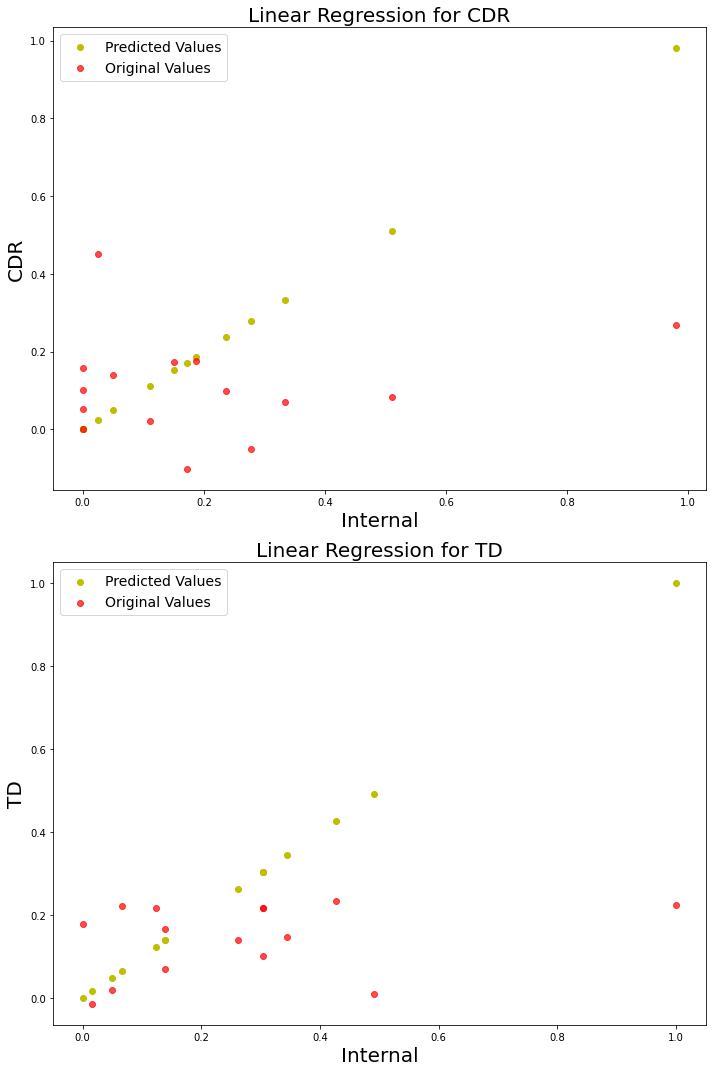

In [601]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
#creating data

fig,ax =  plt.subplots(2,figsize=(10,15))



linearRegression(X1_train,Y1_train,X1_test,Y1_test)


r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of CDR: {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of CDR: {rmse} ")

ax[0].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[0].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[0].set_title("Linear Regression for CDR",fontsize=20)
ax[0].set_xlabel("Internal",fontsize=20)
ax[0].set_ylabel("CDR",fontsize=20)
ax[0].legend(facecolor='white', fontsize=14)



linearRegression(X2_train,Y2_train,X2_test,Y2_test)

r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of TD : {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of TD: {rmse} ")

ax[1].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[1].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[1].set_title("Linear Regression for TD",fontsize=20)
ax[1].set_xlabel("Internal",fontsize=20)
ax[1].set_ylabel("TD",fontsize=20)
ax[1].legend(facecolor='white', fontsize=14)


plt.tight_layout()

R-Squared Value of CDR (rbf): -0.1645564199447962 	Root Mean Squared Error of CDR (rbf): 0.27207868349808145 
R-Squared Value of TD (rbf): -0.07658669531666318 	Root Mean Squared Error of TD (rbf): 0.2539407417364148 
R-Squared Value of CDR (linear): -0.12212300389683195 	Root Mean Squared Error of CDR (linear): 0.2670757664434769 
R-Squared Value of TD (linear) : -0.35263549950476025 	Root Mean Squared Error of TD (linear): 0.28464153328136815 


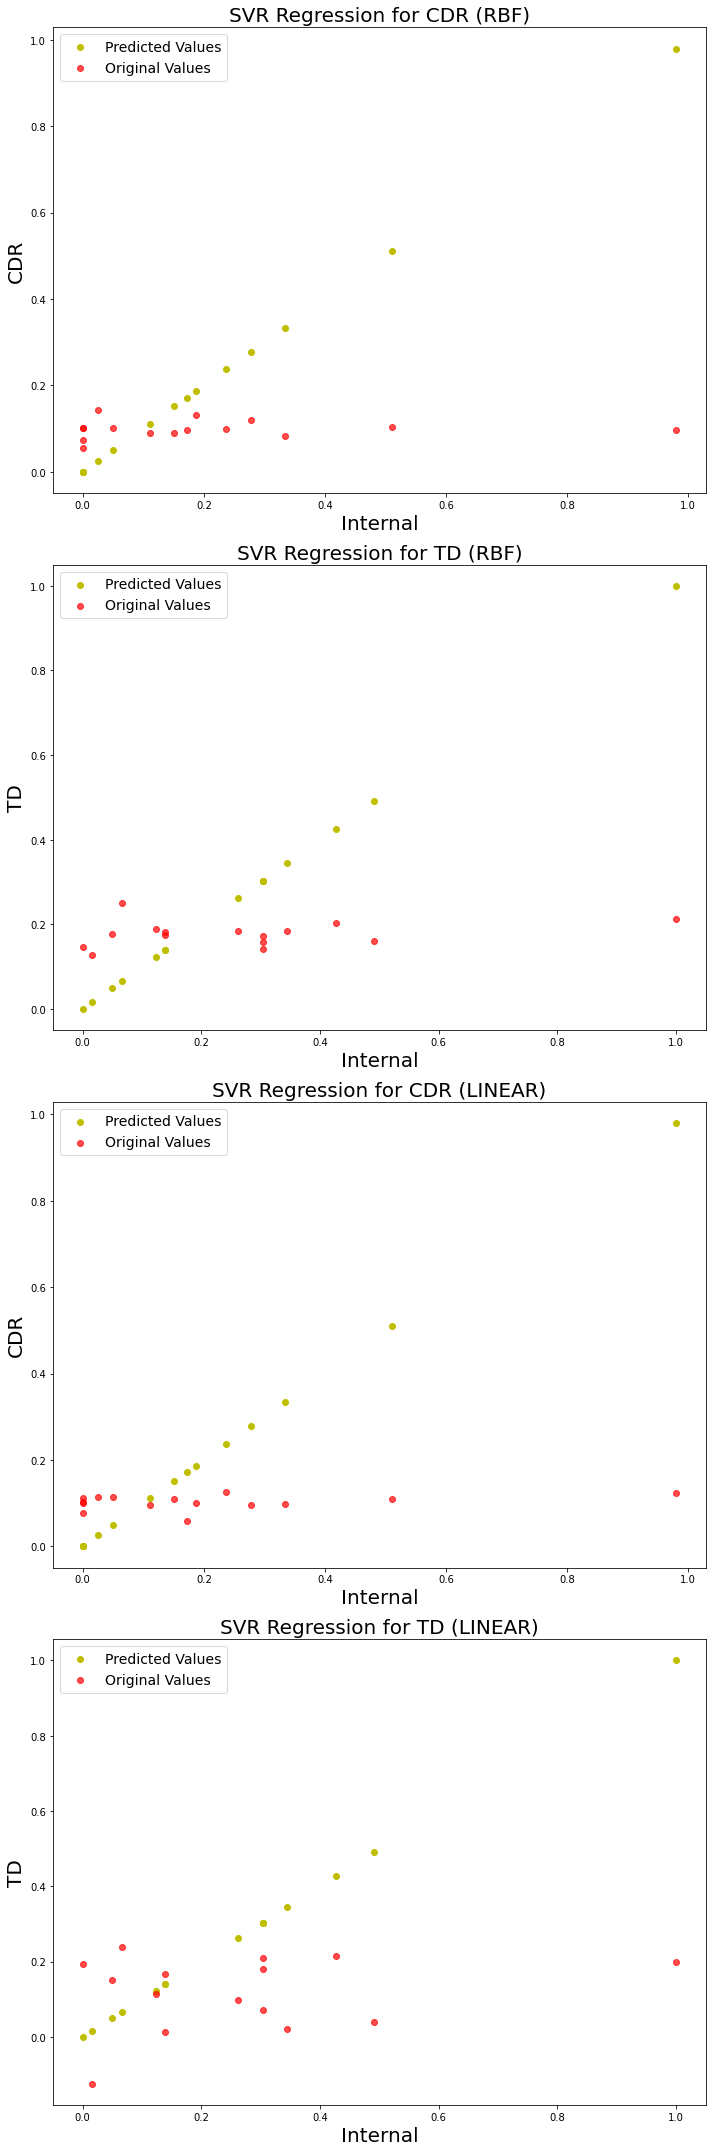

In [602]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )


fig,ax =  plt.subplots(4,figsize=(10,30))



svrRegressionker_rbf(X1_train,Y1_train,X1_test,Y1_test)


r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of CDR (rbf): {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of CDR (rbf): {rmse} ")

ax[0].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[0].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[0].set_title("SVR Regression for CDR (RBF)",fontsize=20)
ax[0].set_xlabel("Internal",fontsize=20)
ax[0].set_ylabel("CDR",fontsize=20)
ax[0].legend(facecolor='white', fontsize=14)



svrRegressionker_rbf(X2_train,Y2_train,X2_test,Y2_test)

r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of TD (rbf): {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of TD (rbf): {rmse} ")

ax[1].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[1].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[1].set_title("SVR Regression for TD (RBF)",fontsize=20)
ax[1].set_xlabel("Internal",fontsize=20)
ax[1].set_ylabel("TD",fontsize=20)
ax[1].legend(facecolor='white', fontsize=14)


svrRegressionker_linear(X1_train,Y1_train,X1_test,Y1_test)


r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of CDR (linear): {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of CDR (linear): {rmse} ")

ax[2].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[2].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[2].set_title("SVR Regression for CDR (LINEAR)",fontsize=20)
ax[2].set_xlabel("Internal",fontsize=20)
ax[2].set_ylabel("CDR",fontsize=20)
ax[2].legend(facecolor='white', fontsize=14)



svrRegressionker_linear(X2_train,Y2_train,X2_test,Y2_test)

r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of TD (linear) : {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of TD (linear): {rmse} ")

ax[3].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[3].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[3].set_title("SVR Regression for TD (LINEAR)",fontsize=20)
ax[3].set_xlabel("Internal",fontsize=20)
ax[3].set_ylabel("TD",fontsize=20)
ax[3].legend(facecolor='white', fontsize=14)


plt.tight_layout()

R-Squared Value of CDR: -0.02894702111950087 	Root Mean Squared Error of CDR: 0.25574712347193057 
R-Squared Value of TD : -0.5062514332432677 	Root Mean Squared Error of TD: 0.3003700426159702 


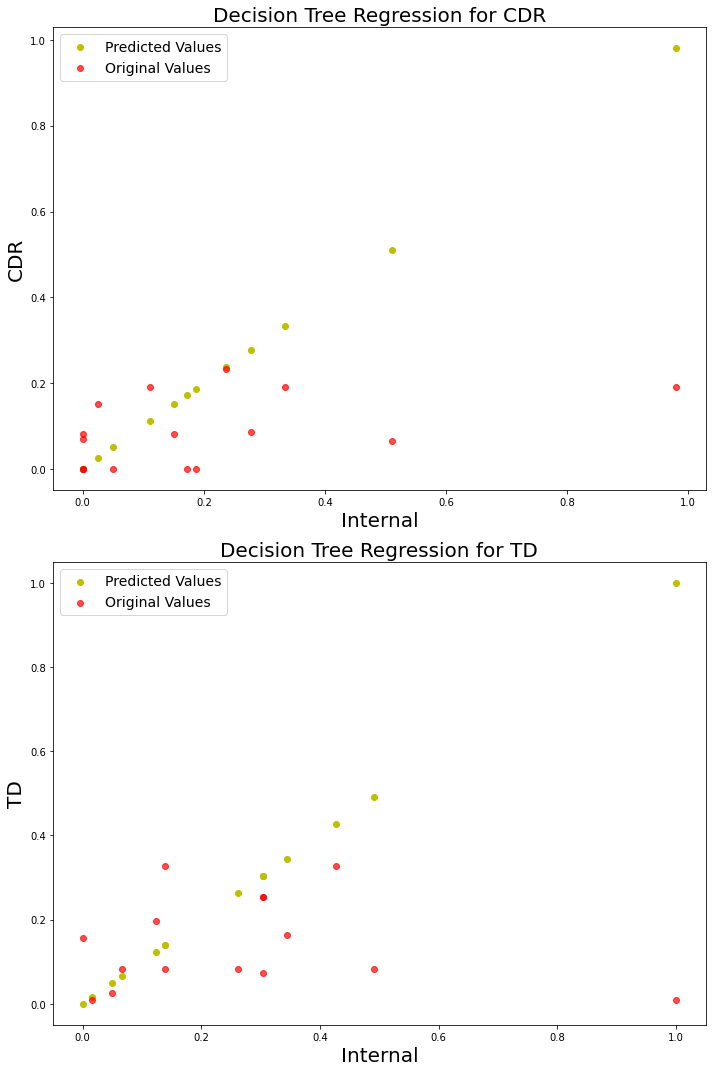

In [603]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )

fig,ax =  plt.subplots(2,figsize=(10,15))


decisionTreeRegression(X1_train,Y1_train,X1_test,Y1_test)


r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of CDR: {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of CDR: {rmse} ")

ax[0].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[0].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[0].set_title("Decision Tree Regression for CDR",fontsize=20)
ax[0].set_xlabel("Internal",fontsize=20)
ax[0].set_ylabel("CDR",fontsize=20)
ax[0].legend(facecolor='white', fontsize=14)



decisionTreeRegression(X2_train,Y2_train,X2_test,Y2_test)

r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of TD : {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of TD: {rmse} ")

ax[1].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[1].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[1].set_title("Decision Tree Regression for TD",fontsize=20)
ax[1].set_xlabel("Internal",fontsize=20)
ax[1].set_ylabel("TD",fontsize=20)
ax[1].legend(facecolor='white', fontsize=14)


plt.tight_layout()


R-Squared Value of CDR: -0.08671420635118765 	Root Mean Squared Error of CDR: 0.2628281770432787 
R-Squared Value of TD : -0.16943310866725803 	Root Mean Squared Error of TD: 0.26466442677737684 


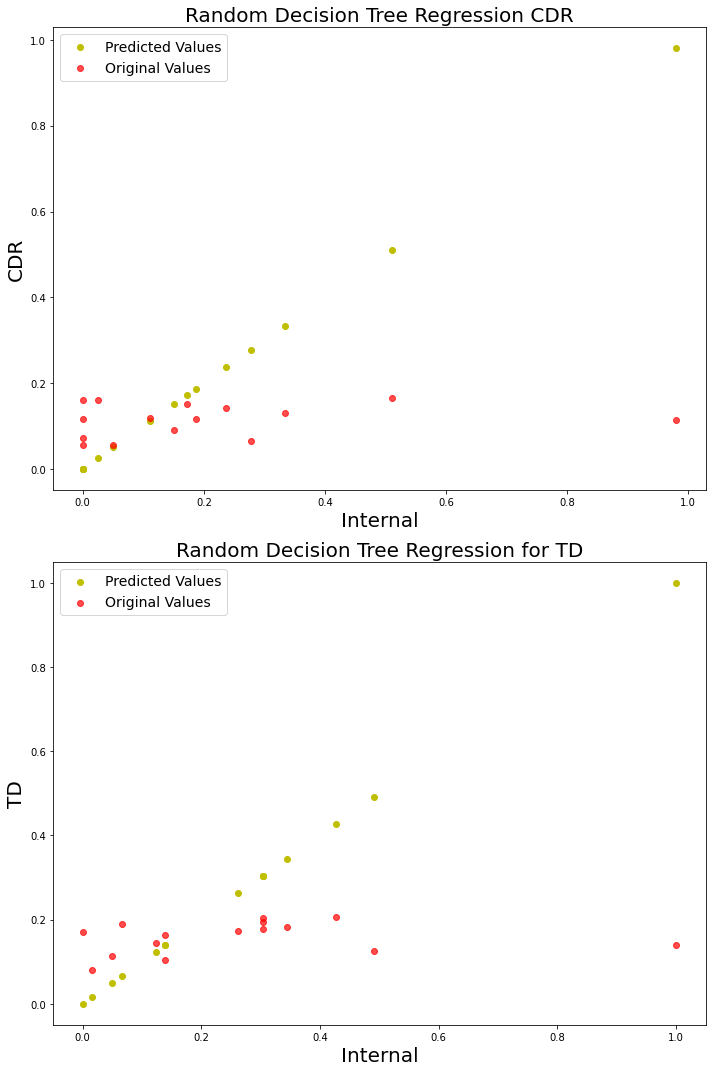

In [604]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )

fig,ax =  plt.subplots(2,figsize=(10,15))



randomDecTreeRegression(X1_train,Y1_train,X1_test,Y1_test)


r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of CDR: {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of CDR: {rmse} ")

ax[0].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[0].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[0].set_title("Random Decision Tree Regression CDR",fontsize=20)
ax[0].set_xlabel("Internal",fontsize=20)
ax[0].set_ylabel("CDR",fontsize=20)
ax[0].legend(facecolor='white', fontsize=14)



randomDecTreeRegression(X2_train,Y2_train,X2_test,Y2_test)

r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of TD : {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of TD: {rmse} ")

ax[1].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[1].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[1].set_title("Random Decision Tree Regression for TD",fontsize=20)
ax[1].set_xlabel("Internal",fontsize=20)
ax[1].set_ylabel("TD",fontsize=20)
ax[1].legend(facecolor='white', fontsize=14)


plt.tight_layout()

R-Squared Value of CDR: -0.12068427072570054 	Root Mean Squared Error of CDR: 0.26690449555377693 
R-Squared Value of TD : -0.507352035303098 	Root Mean Squared Error of TD: 0.30047976119053904 


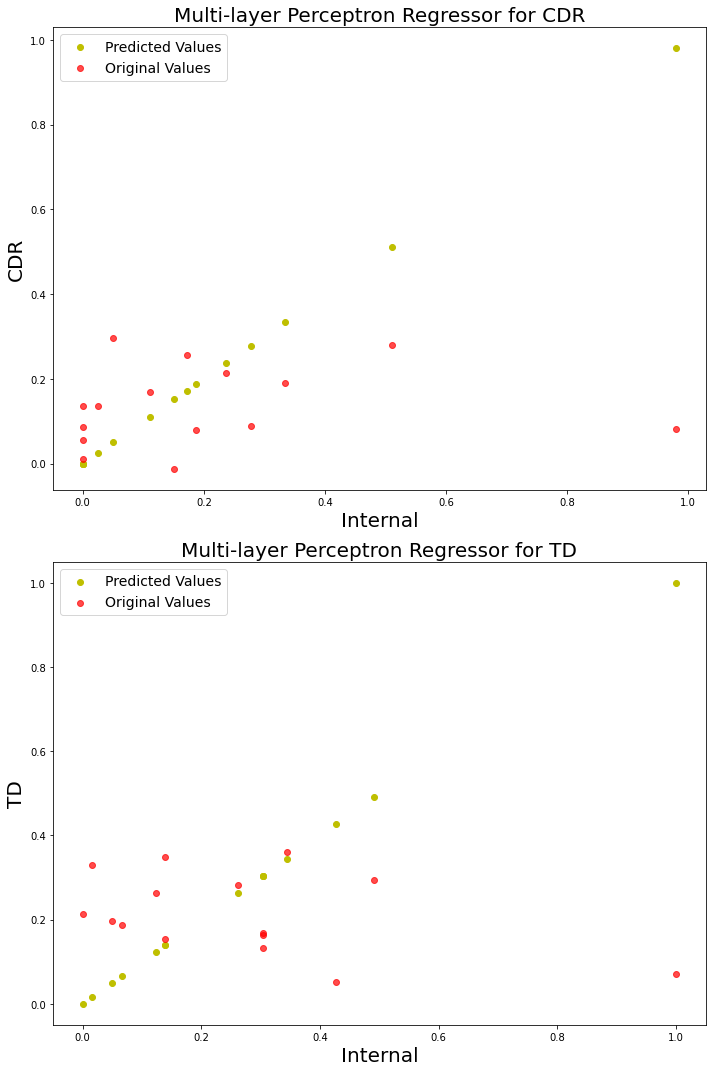

In [605]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )

fig,ax =  plt.subplots(2,figsize=(10,15))



mlpRegressor(X1_train,Y1_train,X1_test,Y1_test)


r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of CDR: {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of CDR: {rmse} ")

ax[0].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[0].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[0].set_title("Multi-layer Perceptron Regressor for CDR",fontsize=20)
ax[0].set_xlabel("Internal",fontsize=20)
ax[0].set_ylabel("CDR",fontsize=20)
ax[0].legend(facecolor='white', fontsize=14)



mlpRegressor(X2_train,Y2_train,X2_test,Y2_test)

r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of TD : {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of TD: {rmse} ")

ax[1].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[1].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[1].set_title("Multi-layer Perceptron Regressor for TD",fontsize=20)
ax[1].set_xlabel("Internal",fontsize=20)
ax[1].set_ylabel("TD",fontsize=20)
ax[1].legend(facecolor='white', fontsize=14)


plt.tight_layout()

In this step (step 4), we will try to estimate Technical Debt using external metrics.

In [606]:
#split data into train and test data

external=df[["NOB","V","SH","CS"]]
td1=df[["CDR"]]
td2=df[["TD"]]

X1_train, X1_test,Y1_train,Y1_test = train_test_split(external,td1,random_state=random_state_fixed ,test_size=0.3)

X2_train, X2_test,Y2_train,Y2_test = train_test_split(external,td2, random_state=random_state_fixed ,test_size=0.3)

R-Squared Value of CDR: -0.29877407933861844 	Root Mean Squared Error of CDR: 0.2873300555429503 
R-Squared Value of TD : -0.4331628534217624 	Root Mean Squared Error of TD: 0.2929919249634493 


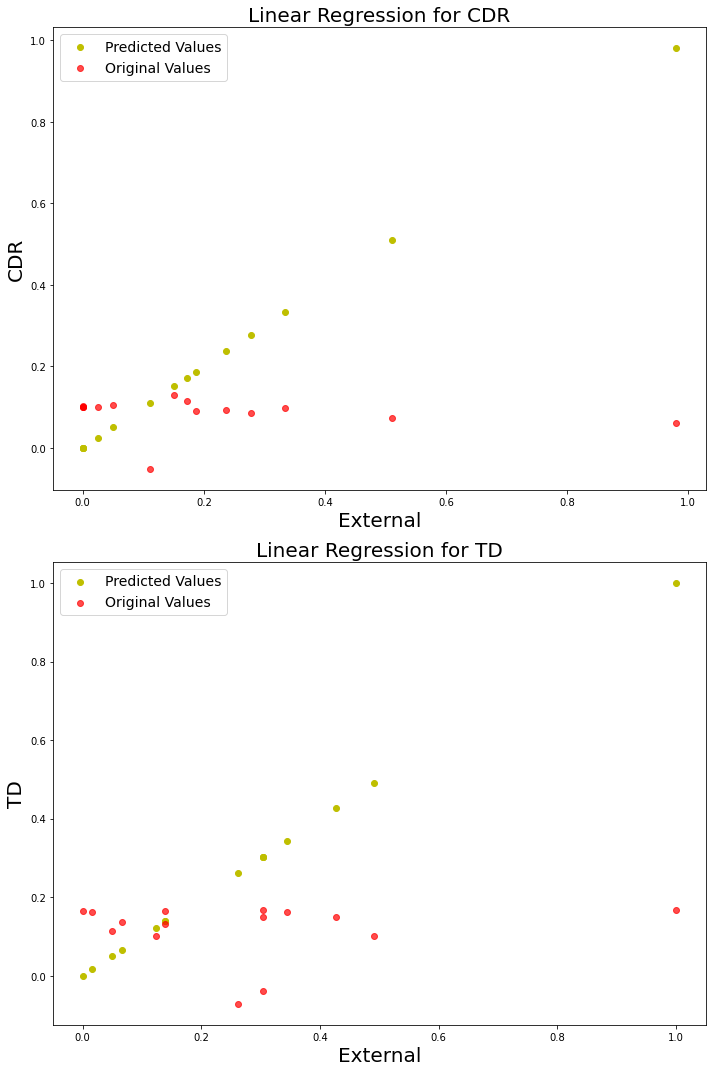

In [607]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )

fig,ax =  plt.subplots(2,figsize=(10,15))

linearRegression(X1_train,Y1_train,X1_test,Y1_test)


r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of CDR: {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of CDR: {rmse} ")

ax[0].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[0].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[0].set_title("Linear Regression for CDR",fontsize=20)
ax[0].set_xlabel("External",fontsize=20)
ax[0].set_ylabel("CDR",fontsize=20)
ax[0].legend(facecolor='white', fontsize=14)


linearRegression(X2_train,Y2_train,X2_test,Y2_test)

r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of TD : {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of TD: {rmse} ")

ax[1].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[1].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[1].set_title("Linear Regression for TD",fontsize=20)
ax[1].set_xlabel("External",fontsize=20)
ax[1].set_ylabel("TD",fontsize=20)
ax[1].legend(facecolor='white', fontsize=14)


plt.tight_layout()

R-Squared Value of CDR (rbf): -0.05742000726843277 	Root Mean Squared Error of CDR (rbf): 0.2592614897703499 
R-Squared Value of TD (rbf): -0.45281551449179935 	Root Mean Squared Error of TD (rbf): 0.2949939533353097 
R-Squared Value of CDR (linear): -0.10105796501066222 	Root Mean Squared Error of CDR (linear): 0.2645570517029422 
R-Squared Value of TD (linear) : -0.3170558678590276 	Root Mean Squared Error of TD (linear): 0.28087299055485854 


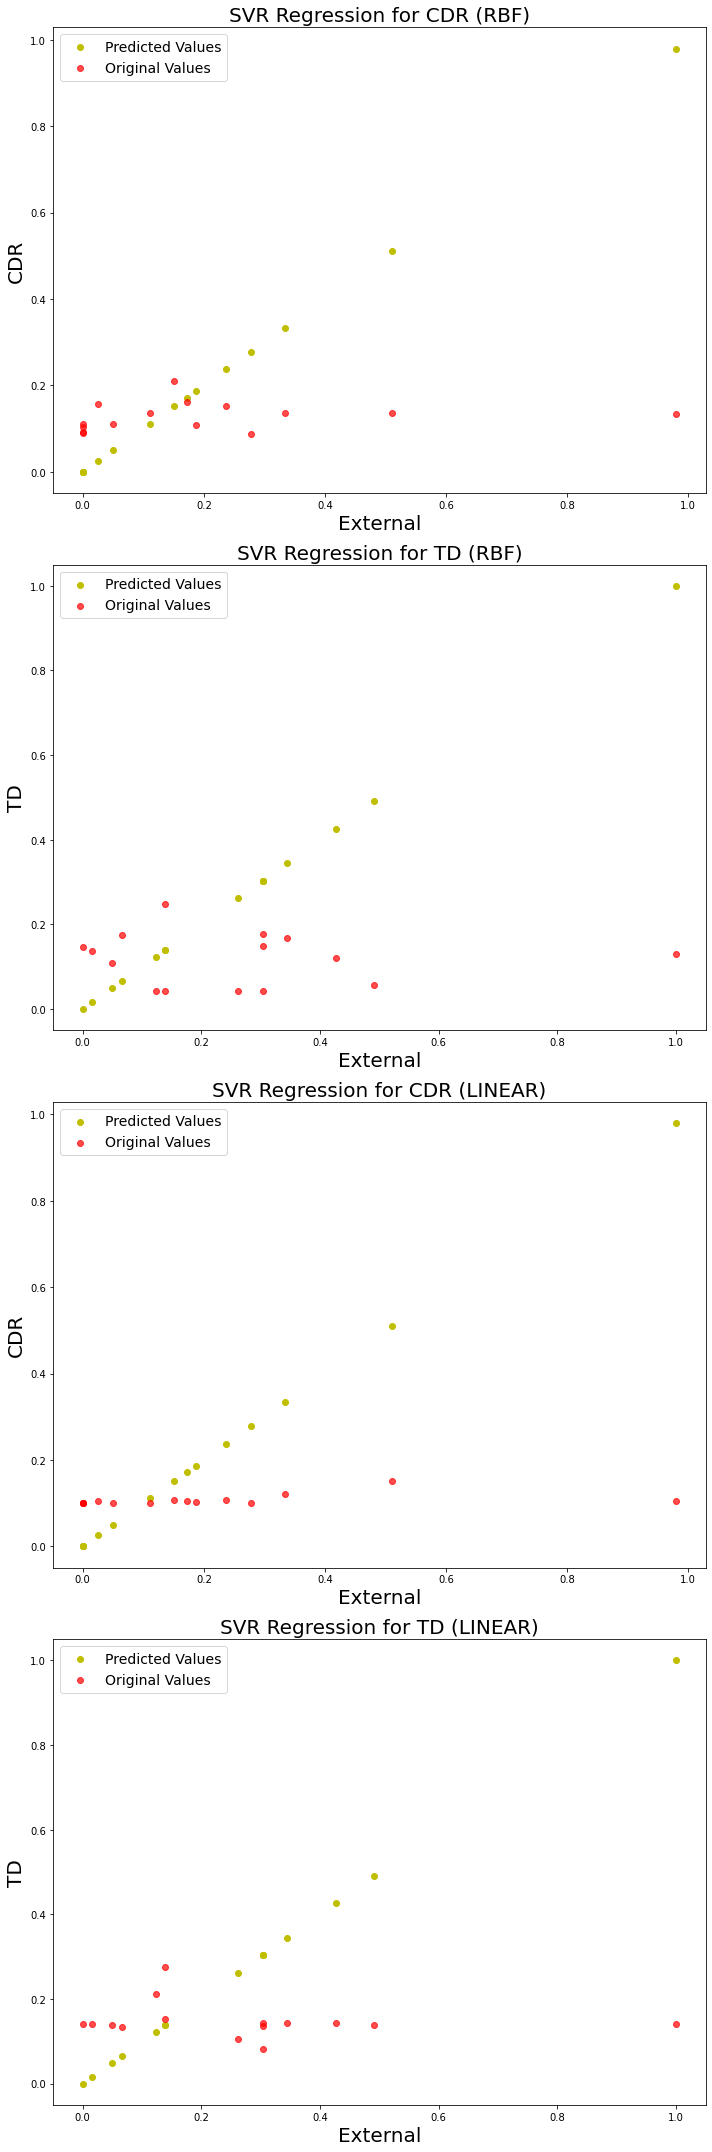

In [608]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )

fig,ax =  plt.subplots(4,figsize=(10,30))



svrRegressionker_rbf(X1_train,Y1_train,X1_test,Y1_test)


r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of CDR (rbf): {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of CDR (rbf): {rmse} ")

ax[0].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[0].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[0].set_title("SVR Regression for CDR (RBF)",fontsize=20)
ax[0].set_xlabel("External",fontsize=20)
ax[0].set_ylabel("CDR",fontsize=20)
ax[0].legend(facecolor='white', fontsize=14)



svrRegressionker_rbf(X2_train,Y2_train,X2_test,Y2_test)

r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of TD (rbf): {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of TD (rbf): {rmse} ")

ax[1].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[1].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[1].set_title("SVR Regression for TD (RBF)",fontsize=20)
ax[1].set_xlabel("External",fontsize=20)
ax[1].set_ylabel("TD",fontsize=20)
ax[1].legend(facecolor='white', fontsize=14)


svrRegressionker_linear(X1_train,Y1_train,X1_test,Y1_test)


r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of CDR (linear): {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of CDR (linear): {rmse} ")

ax[2].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[2].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[2].set_title("SVR Regression for CDR (LINEAR)",fontsize=20)
ax[2].set_xlabel("External",fontsize=20)
ax[2].set_ylabel("CDR",fontsize=20)
ax[2].legend(facecolor='white', fontsize=14)



svrRegressionker_linear(X2_train,Y2_train,X2_test,Y2_test)

r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of TD (linear) : {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of TD (linear): {rmse} ")

ax[3].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[3].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[3].set_title("SVR Regression for TD (LINEAR)",fontsize=20)
ax[3].set_xlabel("External",fontsize=20)
ax[3].set_ylabel("TD",fontsize=20)
ax[3].legend(facecolor='white', fontsize=14)


plt.tight_layout()

R-Squared Value of CDR: -0.49827719657436775 	Root Mean Squared Error of CDR: 0.3086102422213462 
R-Squared Value of TD : -0.7371656181142008 	Root Mean Squared Error of TD: 0.32257335573307827 


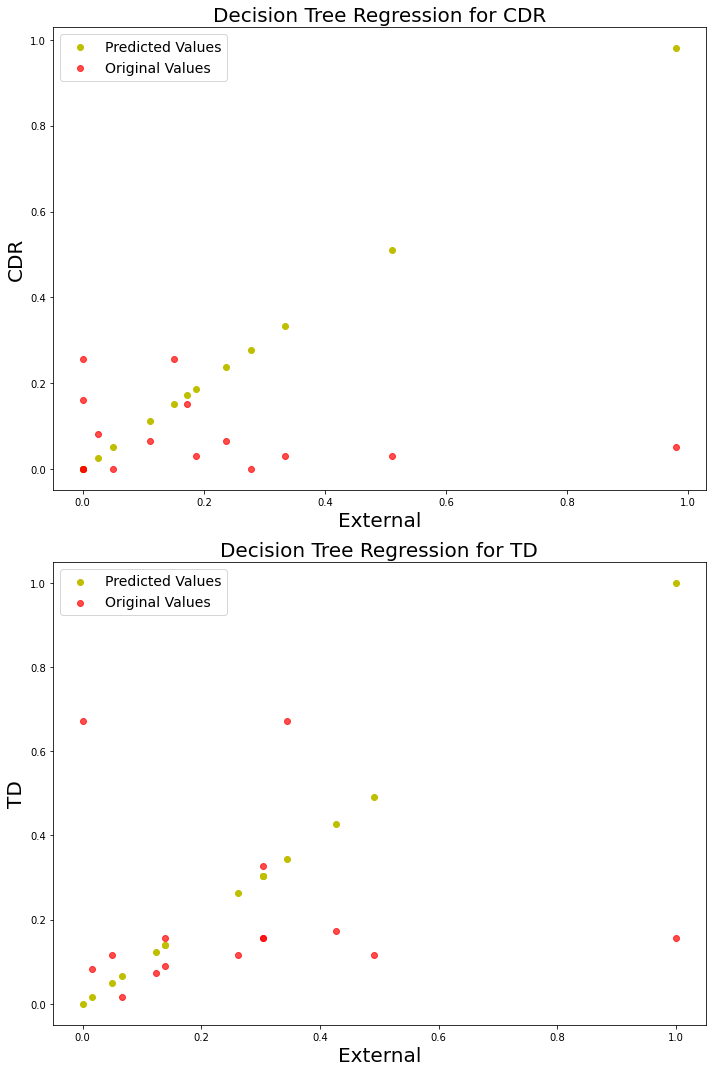

In [609]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )

fig,ax =  plt.subplots(2,figsize=(10,15))



decisionTreeRegression(X1_train,Y1_train,X1_test,Y1_test)


r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of CDR: {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of CDR: {rmse} ")

ax[0].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[0].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[0].set_title("Decision Tree Regression for CDR",fontsize=20)
ax[0].set_xlabel("External",fontsize=20)
ax[0].set_ylabel("CDR",fontsize=20)
ax[0].legend(facecolor='white', fontsize=14)



decisionTreeRegression(X2_train,Y2_train,X2_test,Y2_test)

r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of TD : {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of TD: {rmse} ")

ax[1].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[1].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[1].set_title("Decision Tree Regression for TD",fontsize=20)
ax[1].set_xlabel("External",fontsize=20)
ax[1].set_ylabel("TD",fontsize=20)
ax[1].legend(facecolor='white', fontsize=14)


plt.tight_layout()


R-Squared Value of CDR: -0.26333860652667807 	Root Mean Squared Error of CDR: 0.28338322249338543 
R-Squared Value of TD : -0.12283691062544255 	Root Mean Squared Error of TD: 0.25933803739256533 


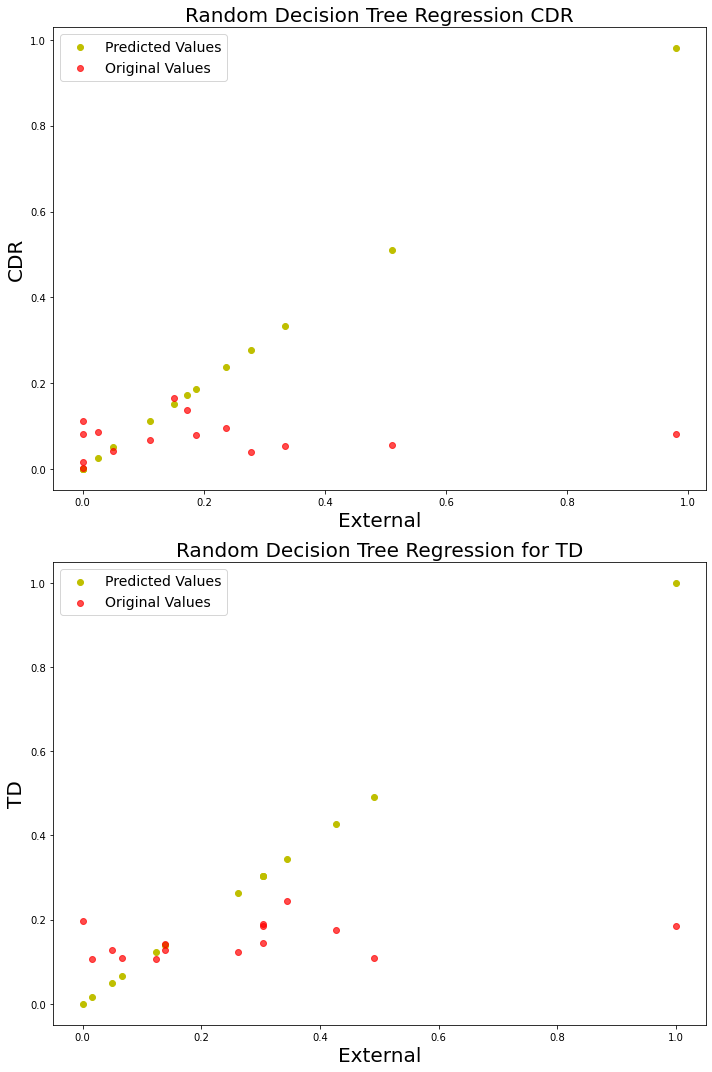

In [610]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )

fig,ax =  plt.subplots(2,figsize=(10,15))



randomDecTreeRegression(X1_train,Y1_train,X1_test,Y1_test)


r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of CDR: {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of CDR: {rmse} ")

ax[0].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[0].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[0].set_title("Random Decision Tree Regression CDR",fontsize=20)
ax[0].set_xlabel("External",fontsize=20)
ax[0].set_ylabel("CDR",fontsize=20)
ax[0].legend(facecolor='white', fontsize=14)



randomDecTreeRegression(X2_train,Y2_train,X2_test,Y2_test)

r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of TD : {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of TD: {rmse} ")

ax[1].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[1].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[1].set_title("Random Decision Tree Regression for TD",fontsize=20)
ax[1].set_xlabel("External",fontsize=20)
ax[1].set_ylabel("TD",fontsize=20)
ax[1].legend(facecolor='white', fontsize=14)


plt.tight_layout()

R-Squared Value of CDR: -0.1733124776552255 	Root Mean Squared Error of CDR: 0.2730996195799929 
R-Squared Value of TD : -0.1905169499496393 	Root Mean Squared Error of TD: 0.2670396014132049 


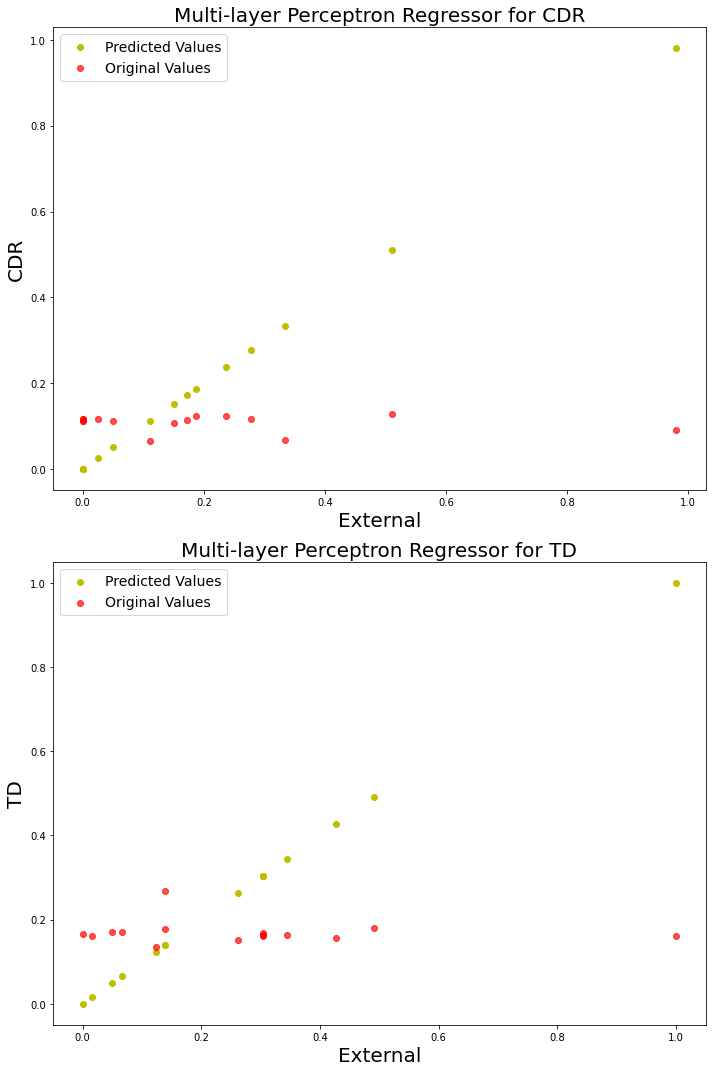

In [611]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )

fig,ax =  plt.subplots(2,figsize=(10,15))



mlpRegressor(X1_train,Y1_train,X1_test,Y1_test)


r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of CDR: {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of CDR: {rmse} ")

ax[0].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[0].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[0].set_title("Multi-layer Perceptron Regressor for CDR",fontsize=20)
ax[0].set_xlabel("External",fontsize=20)
ax[0].set_ylabel("CDR",fontsize=20)
ax[0].legend(facecolor='white', fontsize=14)



mlpRegressor(X2_train,Y2_train,X2_test,Y2_test)

r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of TD : {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of TD: {rmse} ")

ax[1].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[1].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[1].set_title("Multi-layer Perceptron Regressor for TD",fontsize=20)
ax[1].set_xlabel("External",fontsize=20)
ax[1].set_ylabel("TD",fontsize=20)
ax[1].legend(facecolor='white', fontsize=14)


plt.tight_layout()

In this step 5, we will try to estimate Technical Debt using all internal and external metrics.

In [612]:
#split data into train and test data

general=df[["NOB","V","SH","CS","NOC","CBO","LCOM","FanIn","FanOut","RFC","DIT","WMC","LOC","CLOC"]]
td1=df[["CDR"]]
td2=df[["TD"]]

X1_train, X1_test,Y1_train,Y1_test = train_test_split(general,td1,random_state=random_state_fixed ,test_size=0.3)

X2_train, X2_test,Y2_train,Y2_test = train_test_split(general,td2, random_state=random_state_fixed ,test_size=0.3)

R-Squared Value of CDR: -2.009141591295793 	Root Mean Squared Error of CDR: 0.43735647669844585 
R-Squared Value of TD : -0.003633279100097697 	Root Mean Squared Error of TD: 0.24518585195724793 


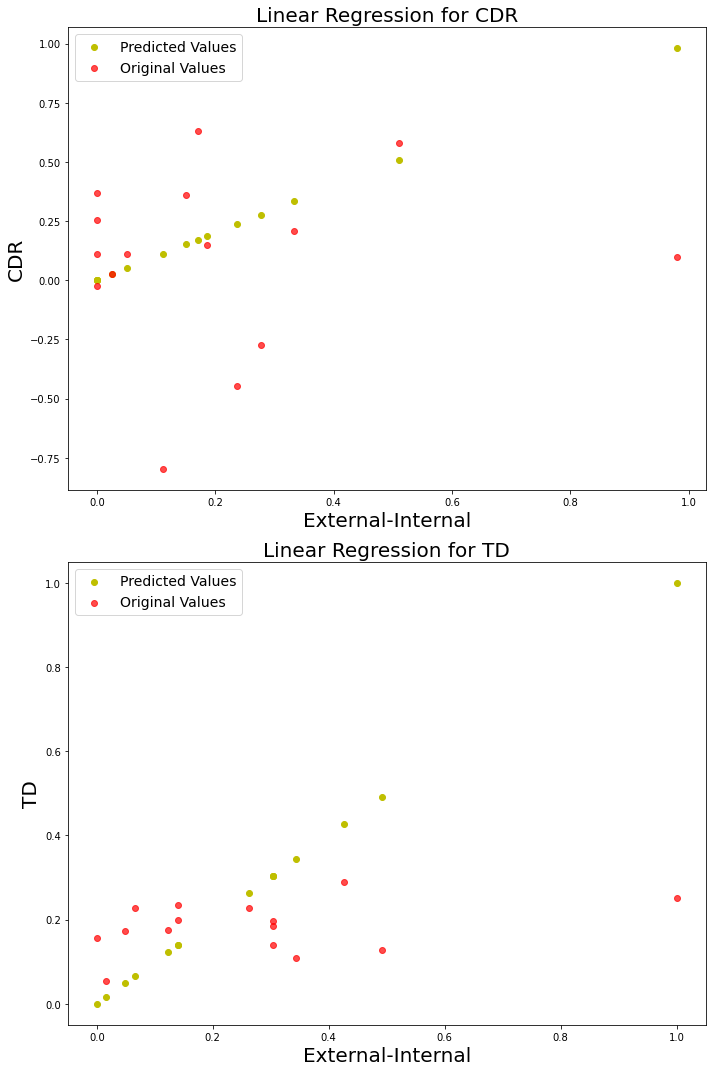

In [613]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )

fig,ax =  plt.subplots(2,figsize=(10,15))

linearRegression(X1_train,Y1_train,X1_test,Y1_test)


r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of CDR: {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of CDR: {rmse} ")

ax[0].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[0].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[0].set_title("Linear Regression for CDR",fontsize=20)
ax[0].set_xlabel("External-Internal",fontsize=20)
ax[0].set_ylabel("CDR",fontsize=20)
ax[0].legend(facecolor='white', fontsize=14)


linearRegression(X2_train,Y2_train,X2_test,Y2_test)

r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of TD : {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of TD: {rmse} ")

ax[1].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[1].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[1].set_title("Linear Regression for TD",fontsize=20)
ax[1].set_xlabel("External-Internal",fontsize=20)
ax[1].set_ylabel("TD",fontsize=20)
ax[1].legend(facecolor='white', fontsize=14)


plt.tight_layout()

R-Squared Value of CDR (rbf): -0.23945919966775864 	Root Mean Squared Error of CDR (rbf): 0.2806922153718834 
R-Squared Value of TD (rbf): -0.09720921648004133 	Root Mean Squared Error of TD (rbf): 0.2563613813817412 
R-Squared Value of CDR (linear): -0.16057097814494847 	Root Mean Squared Error of CDR (linear): 0.27161271934564973 
R-Squared Value of TD (linear) : -0.36281172246930127 	Root Mean Squared Error of TD (linear): 0.2857102425477751 


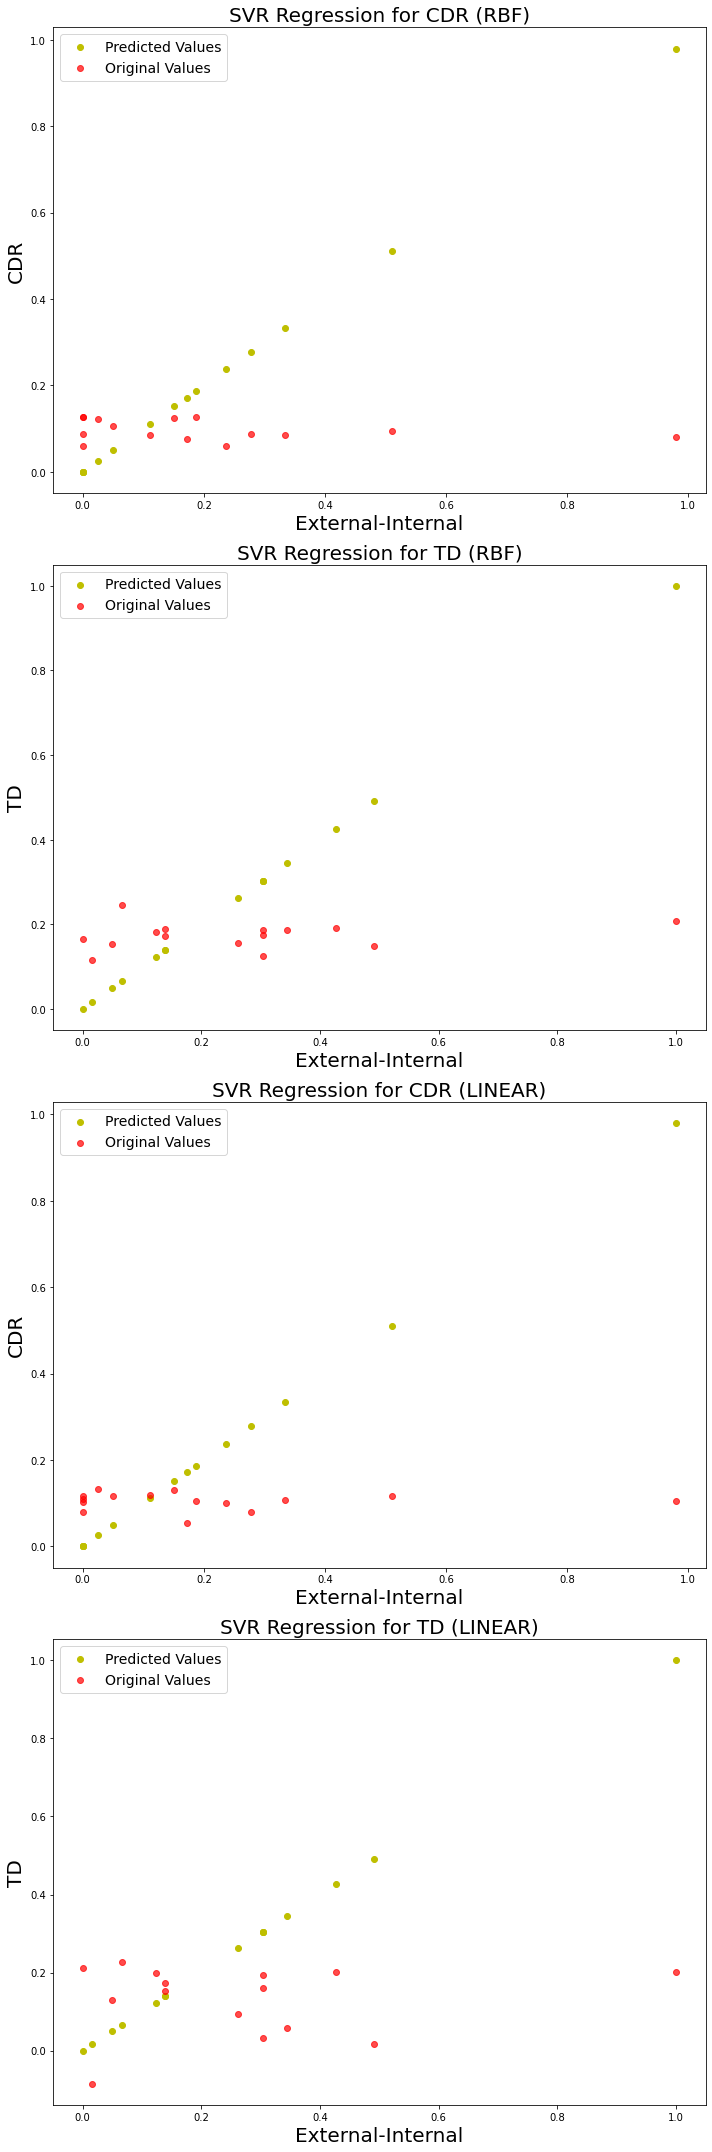

In [614]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )

fig,ax =  plt.subplots(4,figsize=(10,30))



svrRegressionker_rbf(X1_train,Y1_train,X1_test,Y1_test)


r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of CDR (rbf): {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of CDR (rbf): {rmse} ")

ax[0].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[0].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[0].set_title("SVR Regression for CDR (RBF)",fontsize=20)
ax[0].set_xlabel("External-Internal",fontsize=20)
ax[0].set_ylabel("CDR",fontsize=20)
ax[0].legend(facecolor='white', fontsize=14)



svrRegressionker_rbf(X2_train,Y2_train,X2_test,Y2_test)

r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of TD (rbf): {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of TD (rbf): {rmse} ")

ax[1].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[1].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[1].set_title("SVR Regression for TD (RBF)",fontsize=20)
ax[1].set_xlabel("External-Internal",fontsize=20)
ax[1].set_ylabel("TD",fontsize=20)
ax[1].legend(facecolor='white', fontsize=14)


svrRegressionker_linear(X1_train,Y1_train,X1_test,Y1_test)


r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of CDR (linear): {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of CDR (linear): {rmse} ")

ax[2].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[2].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[2].set_title("SVR Regression for CDR (LINEAR)",fontsize=20)
ax[2].set_xlabel("External-Internal",fontsize=20)
ax[2].set_ylabel("CDR",fontsize=20)
ax[2].legend(facecolor='white', fontsize=14)



svrRegressionker_linear(X2_train,Y2_train,X2_test,Y2_test)

r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of TD (linear) : {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of TD (linear): {rmse} ")

ax[3].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[3].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[3].set_title("SVR Regression for TD (LINEAR)",fontsize=20)
ax[3].set_xlabel("External-Internal",fontsize=20)
ax[3].set_ylabel("TD",fontsize=20)
ax[3].legend(facecolor='white', fontsize=14)


plt.tight_layout()

R-Squared Value of CDR: -0.06005913888363734 	Root Mean Squared Error of CDR: 0.2595848233537424 
R-Squared Value of TD : -0.2552967685972658 	Root Mean Squared Error of TD: 0.2742086085703078 


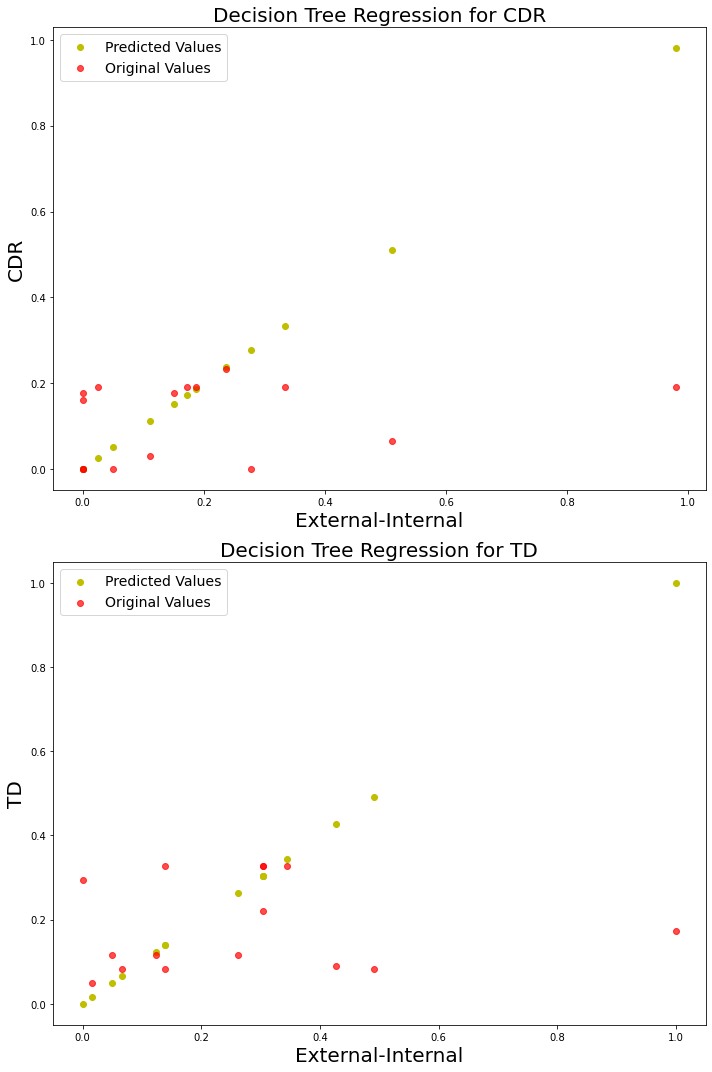

In [615]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )

fig,ax =  plt.subplots(2,figsize=(10,15))



decisionTreeRegression(X1_train,Y1_train,X1_test,Y1_test)


r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of CDR: {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of CDR: {rmse} ")

ax[0].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[0].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[0].set_title("Decision Tree Regression for CDR",fontsize=20)
ax[0].set_xlabel("External-Internal",fontsize=20)
ax[0].set_ylabel("CDR",fontsize=20)
ax[0].legend(facecolor='white', fontsize=14)



decisionTreeRegression(X2_train,Y2_train,X2_test,Y2_test)

r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of TD : {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of TD: {rmse} ")

ax[1].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[1].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[1].set_title("Decision Tree Regression for TD",fontsize=20)
ax[1].set_xlabel("External-Internal",fontsize=20)
ax[1].set_ylabel("TD",fontsize=20)
ax[1].legend(facecolor='white', fontsize=14)


plt.tight_layout()

R-Squared Value of CDR: 0.006095137628095659 	Root Mean Squared Error of CDR: 0.25135449617354866 
R-Squared Value of TD : 0.09223158469346071 	Root Mean Squared Error of TD: 0.23318220973411885 


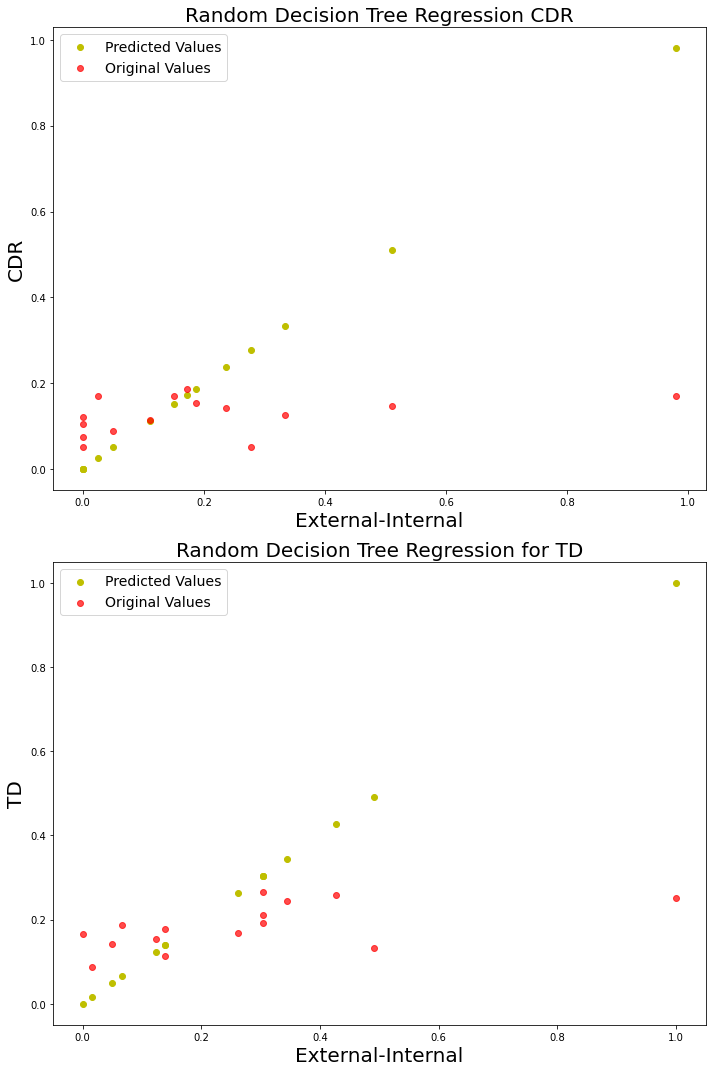

In [616]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )

fig,ax =  plt.subplots(2,figsize=(10,15))



randomDecTreeRegression(X1_train,Y1_train,X1_test,Y1_test)


r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of CDR: {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of CDR: {rmse} ")

ax[0].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[0].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[0].set_title("Random Decision Tree Regression CDR",fontsize=20)
ax[0].set_xlabel("External-Internal",fontsize=20)
ax[0].set_ylabel("CDR",fontsize=20)
ax[0].legend(facecolor='white', fontsize=14)



randomDecTreeRegression(X2_train,Y2_train,X2_test,Y2_test)

r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of TD : {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of TD: {rmse} ")

ax[1].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[1].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[1].set_title("Random Decision Tree Regression for TD",fontsize=20)
ax[1].set_xlabel("External-Internal",fontsize=20)
ax[1].set_ylabel("TD",fontsize=20)
ax[1].legend(facecolor='white', fontsize=14)


plt.tight_layout()

R-Squared Value of CDR: -0.6980033786705335 	Root Mean Squared Error of CDR: 0.3285364239297515 
R-Squared Value of TD : -0.10172340813271141 	Root Mean Squared Error of TD: 0.25688820731178197 


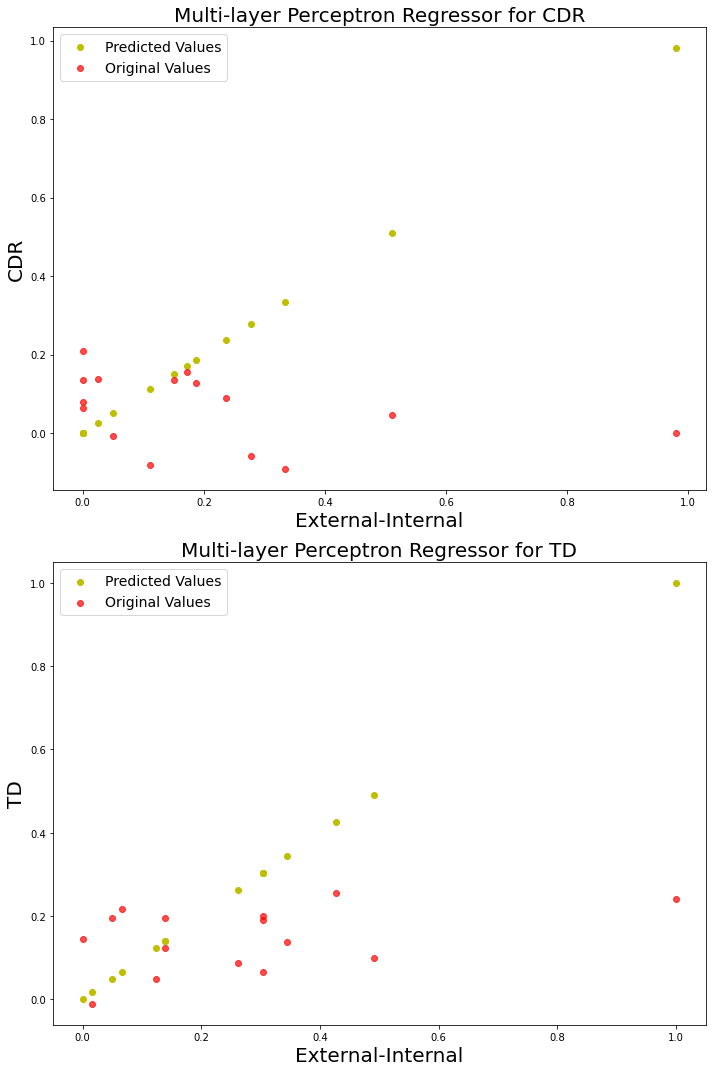

In [617]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )

fig,ax =  plt.subplots(2,figsize=(10,15))



mlpRegressor(X1_train,Y1_train,X1_test,Y1_test)


r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of CDR: {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of CDR: {rmse} ")

ax[0].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[0].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[0].set_title("Multi-layer Perceptron Regressor for CDR",fontsize=20)
ax[0].set_xlabel("External-Internal",fontsize=20)
ax[0].set_ylabel("CDR",fontsize=20)
ax[0].legend(facecolor='white', fontsize=14)



mlpRegressor(X2_train,Y2_train,X2_test,Y2_test)

r_squared=r2_score(yy_test,yy_pred)
print(f"R-Squared Value of TD : {r_squared} \t",end="")
rmse = mean_squared_error(yy_test,yy_pred, squared=False)
print(f"Root Mean Squared Error of TD: {rmse} ")

ax[1].scatter(yy_test,yy_test, color='y', label='Predicted Values')
ax[1].scatter(yy_test,yy_pred, edgecolor='r', facecolor='red', alpha=0.7, label='Original Values')

ax[1].set_title("Multi-layer Perceptron Regressor for TD",fontsize=20)
ax[1].set_xlabel("External-Internal",fontsize=20)
ax[1].set_ylabel("TD",fontsize=20)
ax[1].legend(facecolor='white', fontsize=14)


plt.tight_layout()